In [1]:
!pip install lenskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 5.2 MB/s eta 0:00:00


In [2]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163340 sha256=d2889f308b2e823e3fad5a049ecc103ef05d913f164c12f595b8fb77756e26e0
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
import surprise
import pandas as pd
data = surprise.Dataset.load_builtin('ml-100k')
ddir = surprise.get_dataset_dir()
r_cols = ['user', 'item', 'rating', 'timestamp']
ratings = pd.read_csv(f'{ddir}/ml-100k/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [4]:
ratings.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
from lenskit.datasets import ML100K
from lenskit import batch, topn, util, topn
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, item_knn as knn
import pandas as pd
%matplotlib inline

In [8]:
algo_ii = knn.ItemItem(20)
algo_als = als.BiasedMF(50)

In [9]:
def eval(aname, algo, train, test):
    fittable = util.clone(algo)
    fittable = Recommender.adapt(fittable)
    fittable.fit(train)
    users = test.user.unique()
    recs = batch.recommend(fittable, users, 100)
    recs['Algorithm'] = aname
    return recs

In [10]:
all_recs = []
test_data = []
for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
    test_data.append(test)
    all_recs.append(eval('ItemItem', algo_ii, train, test))
    all_recs.append(eval('ALS', algo_als, train, test))

In [11]:
all_recs = pd.concat(all_recs, ignore_index=True)
all_recs.head()

,item,score,user,rank,Algorithm
0,483,4.942169,1,1,ItemItem
1,318,4.927032,1,2,ItemItem
2,285,4.921874,1,3,ItemItem
3,1367,4.909282,1,4,ItemItem
4,479,4.873113,1,5,ItemItem


In [12]:
test_data = pd.concat(test_data, ignore_index=True)

In [13]:
test_data.head()

,user,item,rating
0,1,86,5
1,1,226,3
2,1,118,3
3,1,76,4
4,1,181,5


from matplotlib import pyplot as plt
_df_0['item'].plot(kind='hist', bins=20, title='item')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
_df_1['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 6))
_df_2.plot(kind='scatter', x='item', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['user']
  ys = series['item']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('user', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user')
plt.ylabel('item')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['user']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('user', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user')
plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['user']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'user'}, axis=1)
              .sort_values('user', ascending=True))
  xs = counted['user']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('user', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user')
plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['item'].plot(kind='line', figsize=(8, 4), title='item')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
_df_7['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

In [14]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
results = rla.compute(all_recs, test_data)
results.head()

nrecs      ndcg
Algorithm user                 
ItemItem  1       100  0.127120
          3       100  0.066203
          8       100  0.034464
          9       100  0.056086
          11      100  0.043238

from matplotlib import pyplot as plt
_df_8['ndcg'].plot(kind='hist', bins=20, title='ndcg')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['nrecs']
  ys = series['ndcg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('nrecs', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('nrecs')
plt.ylabel('ndcg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['nrecs']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'nrecs'}, axis=1)
              .sort_values('nrecs', ascending=True))
  xs = counted['nrecs']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('nrecs', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('nrecs')
plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['ndcg'].plot(kind='line', figsize=(8, 4), title='ndcg')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

In [15]:
results.groupby('Algorithm').ndcg.mean()

Algorithm
ALS         0.136786
ItemItem    0.101988
Name: ndcg, dtype: float64

<Axes: xlabel='Algorithm'>

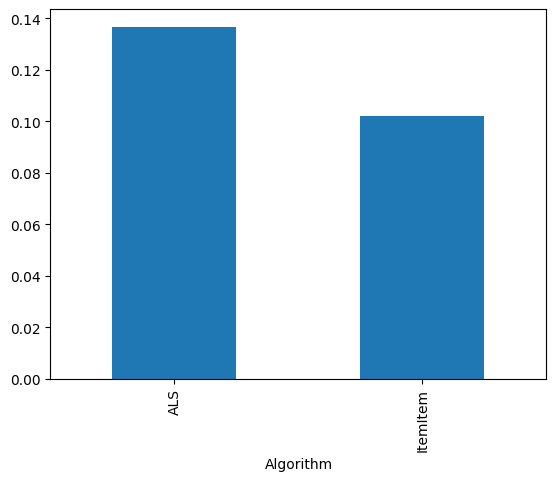

In [16]:
results.groupby('Algorithm').ndcg.mean().plot.bar()